In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200615_h3k9me3'

In [3]:
file=f'{bigDir}\\cellinfo_200615v5.csv'

In [7]:
data=pd.read_csv(file)

# data visualizations 

In [8]:
data=data.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'])

In [9]:
data.head()

,file,original_name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,outer_mcm_eu,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu
0,20200615_cell_00.ciz,20200615_29_11_63x.czi,200614xy29,1781.995,159.930,H3K9Me3,1,MCM2,2,3,...,5.537854e+08,2.906368e+09,8.883452e+08,2.018023e+09,1.050492e+09,394953135.0,655538618.0,1.855876e+09,493392059.0,1.362484e+09
1,20200615_cell_01.ciz,20200615_29_18_63x.czi,200614xy29,1534.667,302.703,H3K9Me3,1,MCM2,2,3,...,8.859426e+08,2.902209e+09,8.534346e+08,2.048775e+09,1.041396e+09,508400349.0,532995207.0,1.860814e+09,345034251.0,1.515780e+09
2,20200615_cell_02.ciz,20200615_29_23_63x.czi,200614xy29,558.209,366.997,H3K9Me3,1,MCM2,2,3,...,1.178703e+09,2.678936e+09,8.294657e+08,1.849470e+09,9.278681e+08,394764405.0,533103706.0,1.751068e+09,434701298.0,1.316367e+09
3,20200615_cell_03.ciz,20200615_29_24_63x.czi,200614xy29,1147.608,371.829,H3K9Me3,1,MCM2,2,3,...,1.797484e+09,3.867871e+09,1.053710e+09,2.814161e+09,1.260399e+09,455969764.0,804429554.0,2.607472e+09,597740006.0,2.009732e+09
4,20200615_cell_04.ciz,20200615_29_31_63x.czi,200614xy29,1649.449,469.520,H3K9Me3,1,MCM2,2,3,...,9.824787e+08,3.541353e+09,1.288501e+09,2.252852e+09,1.300548e+09,823831991.0,476715783.0,2.240805e+09,464669286.0,1.776136e+09


In [11]:
data.loc[(['earlyG1' in x for x in data.category] & (data.mol_age_mod > 0.5)), ('physical_age','file')]

,physical_age,file
0,2.000000,20200604_cell_00.ciz
43,2.333333,20200604_cell_43.ciz
45,2.666667,20200604_cell_45.ciz


# note

Plotting the G1 phase cells with molecular age that is **lower than 1.2**. 

<IPython.core.display.Javascript object>


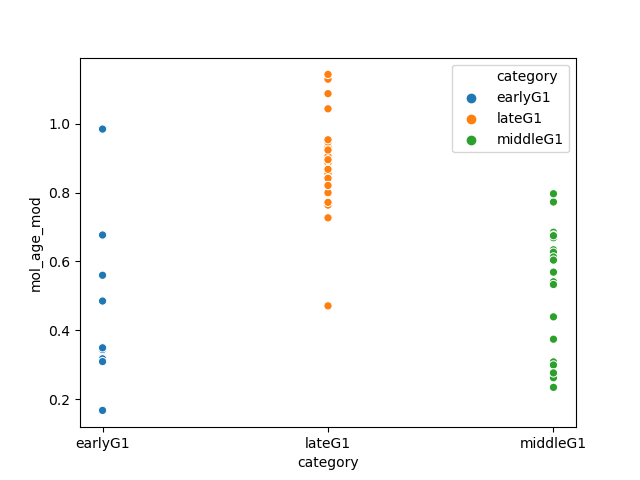

In [14]:
%matplotlib notebook
sn.scatterplot(x='category',y='mol_age_mod',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


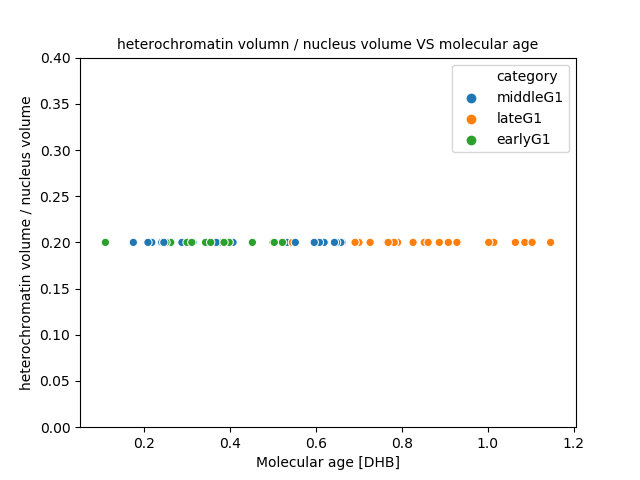

(0, 0.4)

In [10]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age',fontsize=10)
plt.ylim(0,0.4)

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


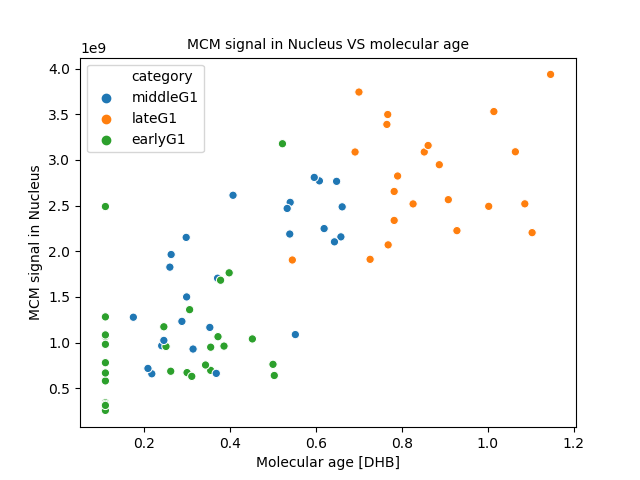

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [11]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age', fontsize=10)

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


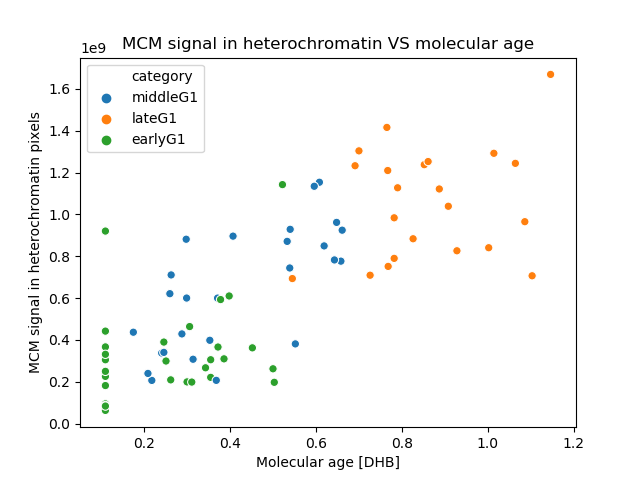

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [12]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age', fontsize=12)

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


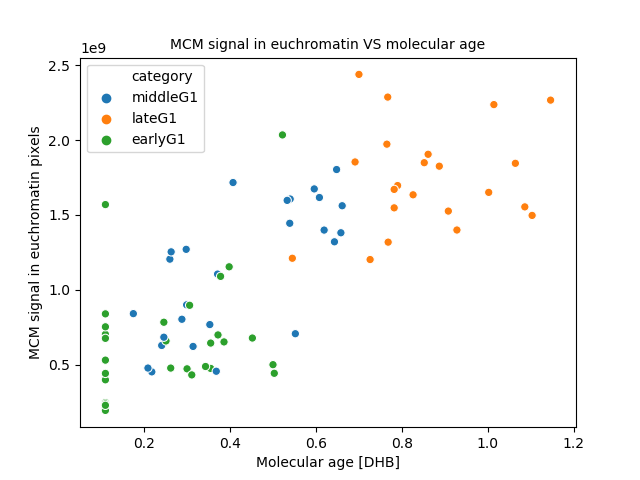

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [13]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age', fontsize=10)

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


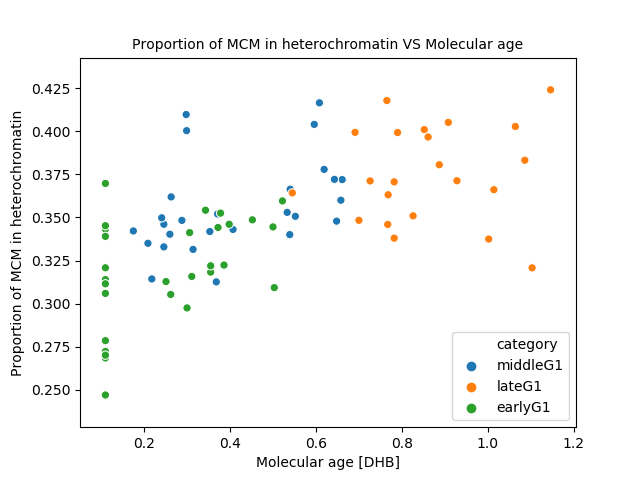

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [14]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod <1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age', fontsize=10)

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


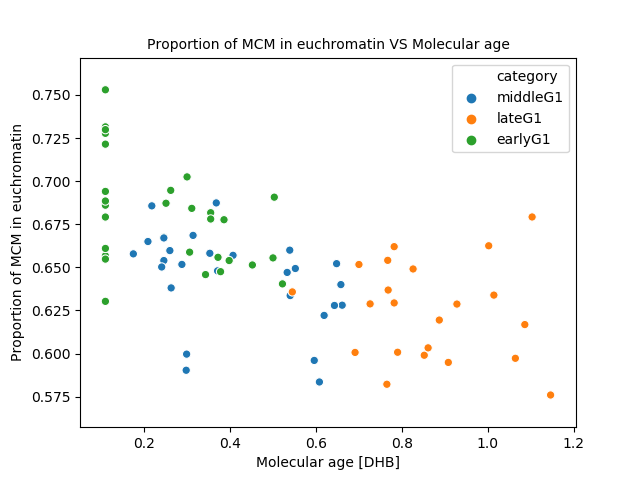

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [15]:
%matplotlib notebook
data['temp']=data.nuc_mcm_eu/data.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age', fontsize=10)

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


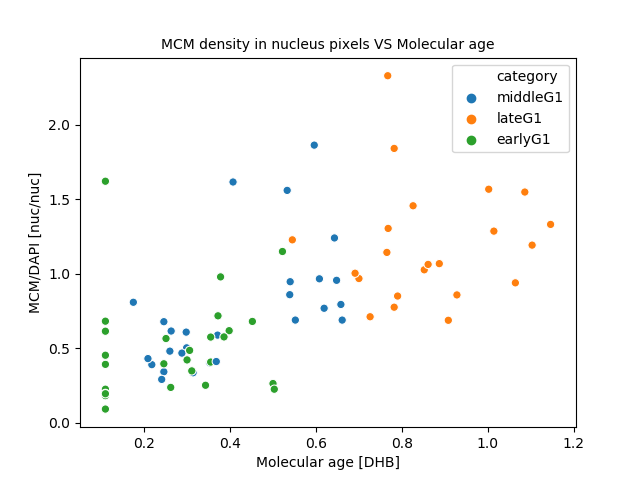

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [16]:
%matplotlib notebook
data['temp']=data.nuc_mcm_total/data.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]  & (data.mol_age_mod <1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age', fontsize=10)

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


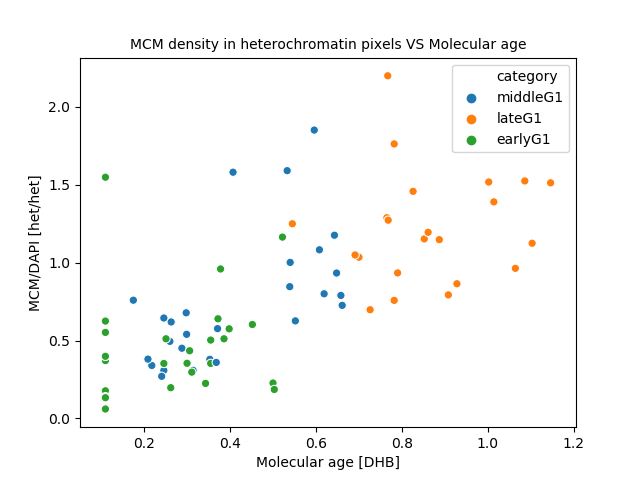

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [17]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age', fontsize=10)

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


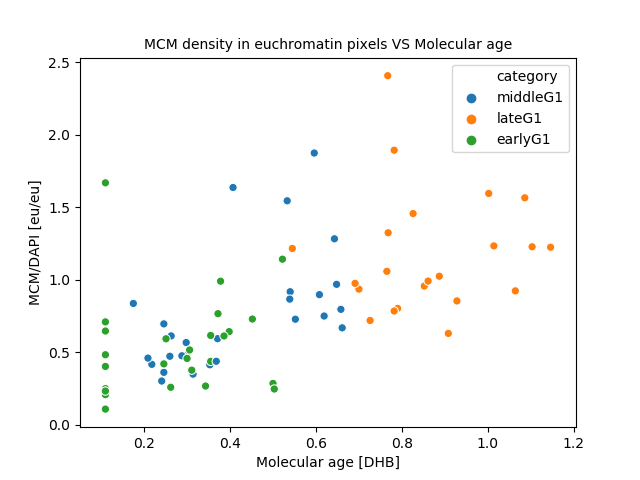

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [18]:
%matplotlib notebook
data['temp']=data.nuc_mcm_eu/data.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age', fontsize=10)

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


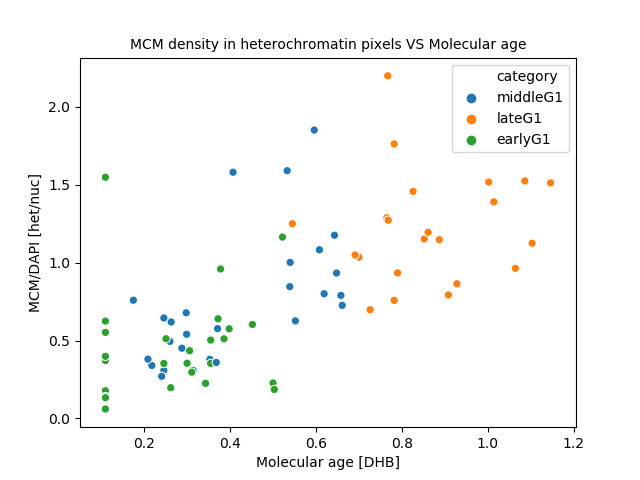

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [19]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age', fontsize=10)

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


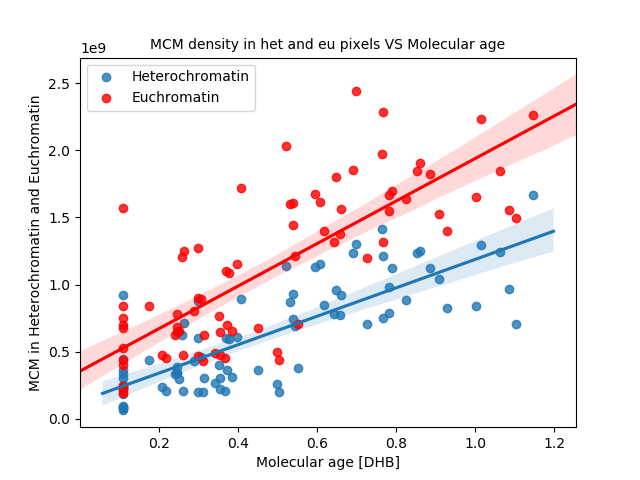

In [20]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het
data['temp2']=data.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:], 
           color="r", label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age', fontsize=10)
plt.legend(loc="upper left")



## 11.  mcm/dapi in heterochromatin/nucleus pixels vs molecular age

<IPython.core.display.Javascript object>


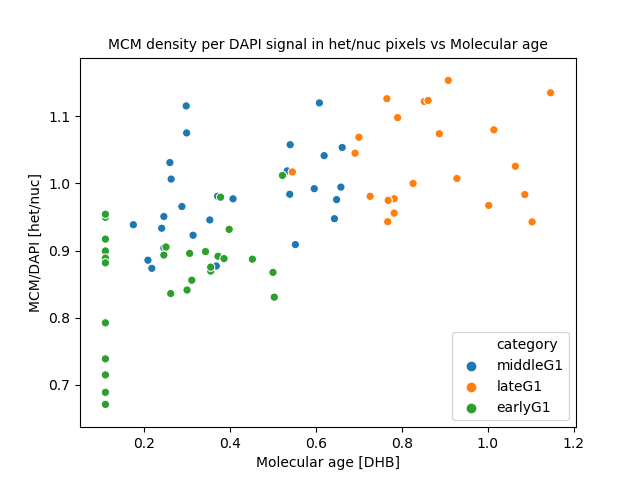

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [22]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)), :], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


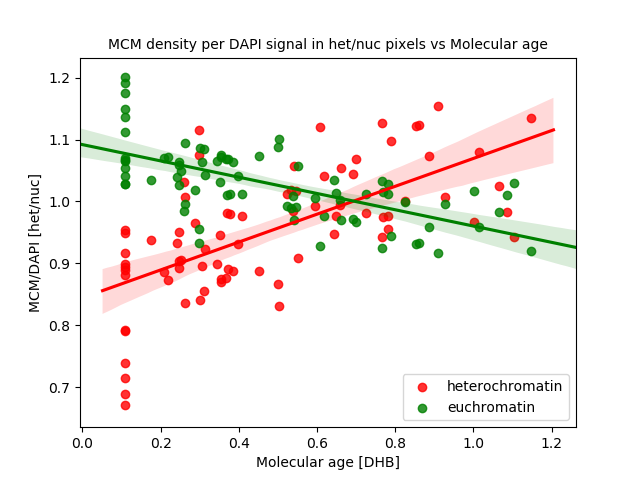

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [23]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_DAPI_eu)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)